In [20]:
import os
import cv2
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [21]:
DATA_DIR = 'C:/Users/NJS/Desktop/CVPR Final Assignment/Dataset'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'Test')

In [22]:
IMG_SIZE = 255
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['Aurko', 'Masum', 'Shamim']


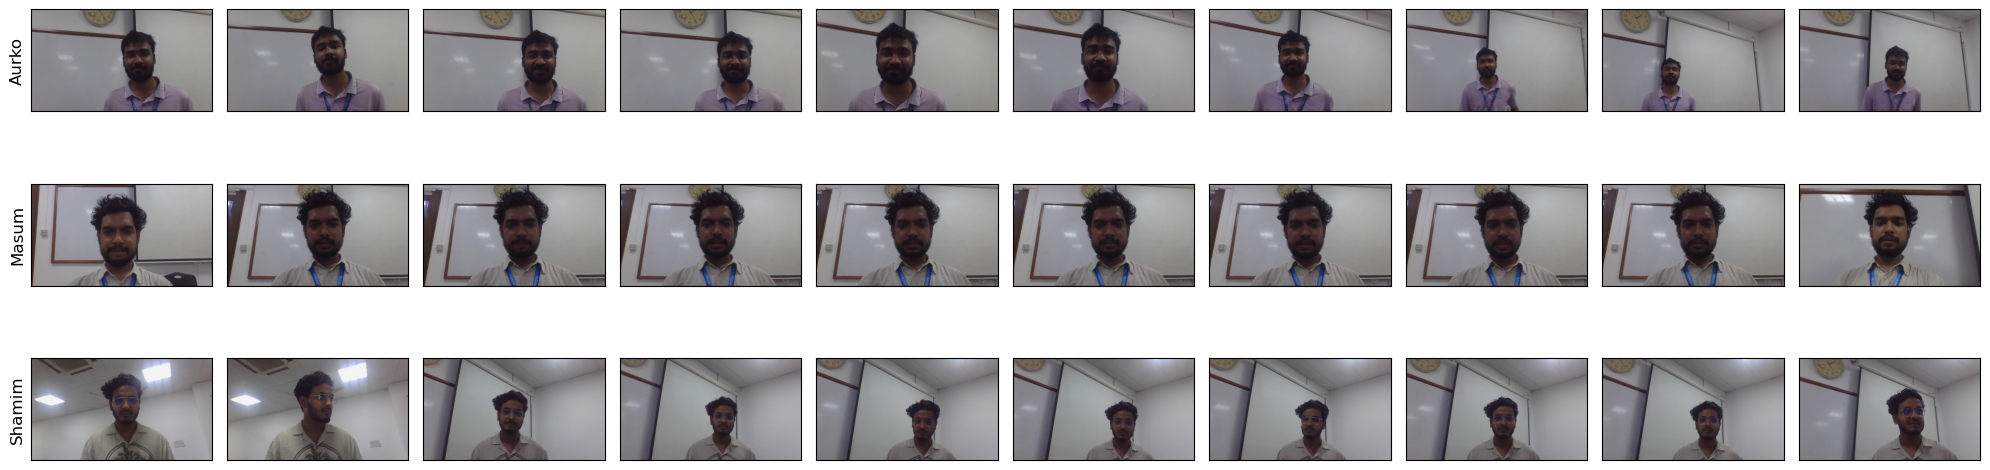

In [23]:
plt.figure(figsize=(20, len(CATEGORIES) * 2))  # Adjust figure size based on the number of categories
i = 0
for idx, c in enumerate(CATEGORIES):
    path = os.path.join(TRAIN_DATA_DIR, c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        plt.subplot(len(CATEGORIES), 10, i + 1)  # Create a grid with rows equal to the number of categories
        plt.imshow(img_array)
        if i % 10 == 0:
            plt.ylabel(c, fontsize=12)  # Add category label to the left of each row
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()

In [24]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            training_data.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(training_data))

100%|██████████| 61/61 [00:00<00:00, 297.66it/s]

183


In [25]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 15/15 [00:00<00:00, 302.39it/s]

45


In [26]:
random.shuffle(training_data)
random.shuffle(test_data)

In [27]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,255,255,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (183, 255, 255, 3) Y_train= (183,)


In [28]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (45, 255, 255, 3) Y_test= (45,)


In [29]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [30]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(255,255,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(4,4)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 251, 251, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 860,931 (3.28 MB)

 Trainable params: 860,931 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.keras import TqdmCallback

# Define a callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with tqdm and save the best model
h = model.fit(
    x=X_train, 
    y=Y_train, 
    epochs=30, 
    validation_split=0.2, 
    batch_size=32, 
    callbacks=[TqdmCallback(verbose=1), checkpoint]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.3334 - loss: 1.3431
Epoch 1: val_accuracy improved from -inf to 0.27027, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.3544 - loss: 1.3356 - val_accuracy: 0.2703 - val_loss: 1.0898
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5051 - loss: 1.0768
Epoch 2: val_accuracy improved from 0.27027 to 0.72973, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.5111 - loss: 1.0766 - val_accuracy: 0.7297 - val_loss: 1.0275
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5665 - loss: 1.0328
Epoch 3: val_accuracy did not improve from 0.72973
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.5657 - loss: 1.0311 - val_accuracy: 0.7027 - val_loss: 0.9447
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6332 - loss: 0.9253
Epoch 4: val_accuracy did not improve from 0.72973
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6395 - loss: 0.9183 - val_accuracy: 0.6757 - val_loss: 0.7810
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.7048 - loss: 0.7209
Epoch 5: val_accuracy improved from 0.72973 to 0.78378, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.7072 - loss: 0.7145 - val_accuracy: 0.7838 - val_loss: 0.6749
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8079 - loss: 0.5719
Epoch 6: val_accuracy did not improve from 0.78378
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.8056 - loss: 0.5720 - val_accuracy: 0.7568 - val_loss: 0.6725
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8549 - loss: 0.4404
Epoch 7: val_accuracy improved from 0.78378 to 0.81081, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.8471 - loss: 0.4626 - val_accuracy: 0.8108 - val_loss: 0.5916
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8202 - loss: 0.4945
Epoch 8: val_accuracy improved from 0.81081 to 0.83784, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.8170 - loss: 0.5016 - val_accuracy: 0.8378 - val_loss: 0.4868
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8584 - loss: 0.3842
Epoch 9: val_accuracy improved from 0.83784 to 0.86486, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.8569 - loss: 0.3879 - val_accuracy: 0.8649 - val_loss: 0.4198
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8977 - loss: 0.3354
Epoch 10: val_accuracy did not improve from 0.86486
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.8942 - loss: 0.3367 - val_accuracy: 0.8378 - val_loss: 0.4523
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9142 - loss: 0.2763
Epoch 11: val_accuracy improved from 0.86486 to 0.89189, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9125 - loss: 0.2785 - val_accuracy: 0.8919 - val_loss: 0.2741
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9108 - loss: 0.2470
Epoch 12: val_accuracy did not improve from 0.89189
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.9109 - loss: 0.2483 - val_accuracy: 0.8108 - val_loss: 0.4230
Epoch 13/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9521 - loss: 0.1695
Epoch 13: val_accuracy improved from 0.89189 to 0.91892, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9509 - loss: 0.1714 - val_accuracy: 0.9189 - val_loss: 0.1931
Epoch 14/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9645 - loss: 0.1390
Epoch 14: val_accuracy improved from 0.91892 to 0.94595, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.9647 - loss: 0.1377 - val_accuracy: 0.9459 - val_loss: 0.1293
Epoch 15/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9749 - loss: 0.0979
Epoch 15: val_accuracy improved from 0.94595 to 0.97297, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9734 - loss: 0.1004 - val_accuracy: 0.9730 - val_loss: 0.1658
Epoch 16/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9837 - loss: 0.0989
Epoch 16: val_accuracy did not improve from 0.97297
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9841 - loss: 0.0993 - val_accuracy: 0.9459 - val_loss: 0.1650
Epoch 17/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9986 - loss: 0.0428
Epoch 17: val_accuracy did not improve from 0.97297
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.9977 - loss: 0.0432 - val_accuracy: 0.9730 - val_loss: 0.1475
Epoch 18/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9950 - loss: 0.0346
Epoch 18: val_accuracy did not improve from 0.97297
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.9947 - loss: 0.0361 - val_accuracy: 0.8649 - val_loss: 0.3010
Epoch 19/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 1.0000 - loss: 0.0346
Epoch 19: val_accuracy did not improve from 

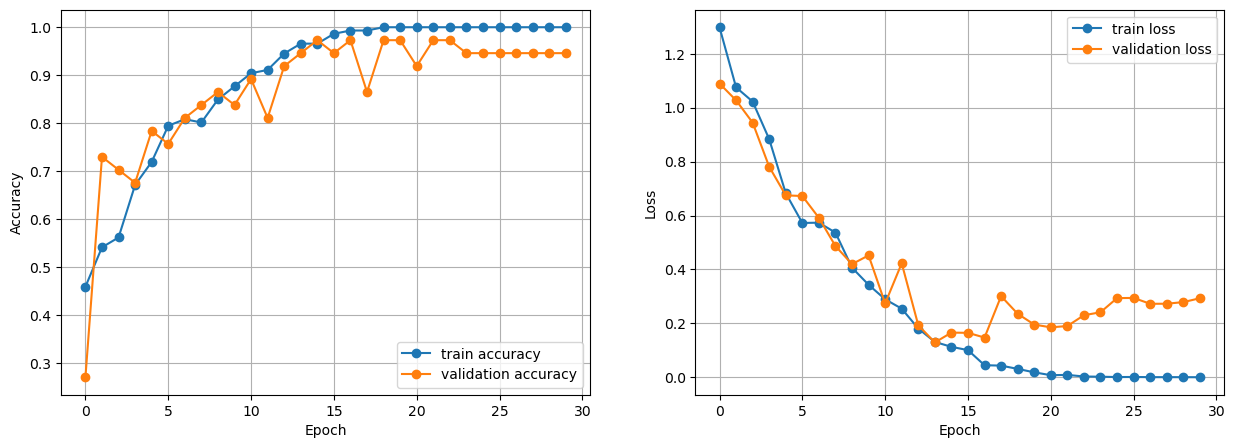

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8486 - loss: 0.5218

Test Accuracy: 0.8666666746139526

Test Loss: 0.4657699167728424


In [35]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [36]:
np.argmax(predictions[0])

0

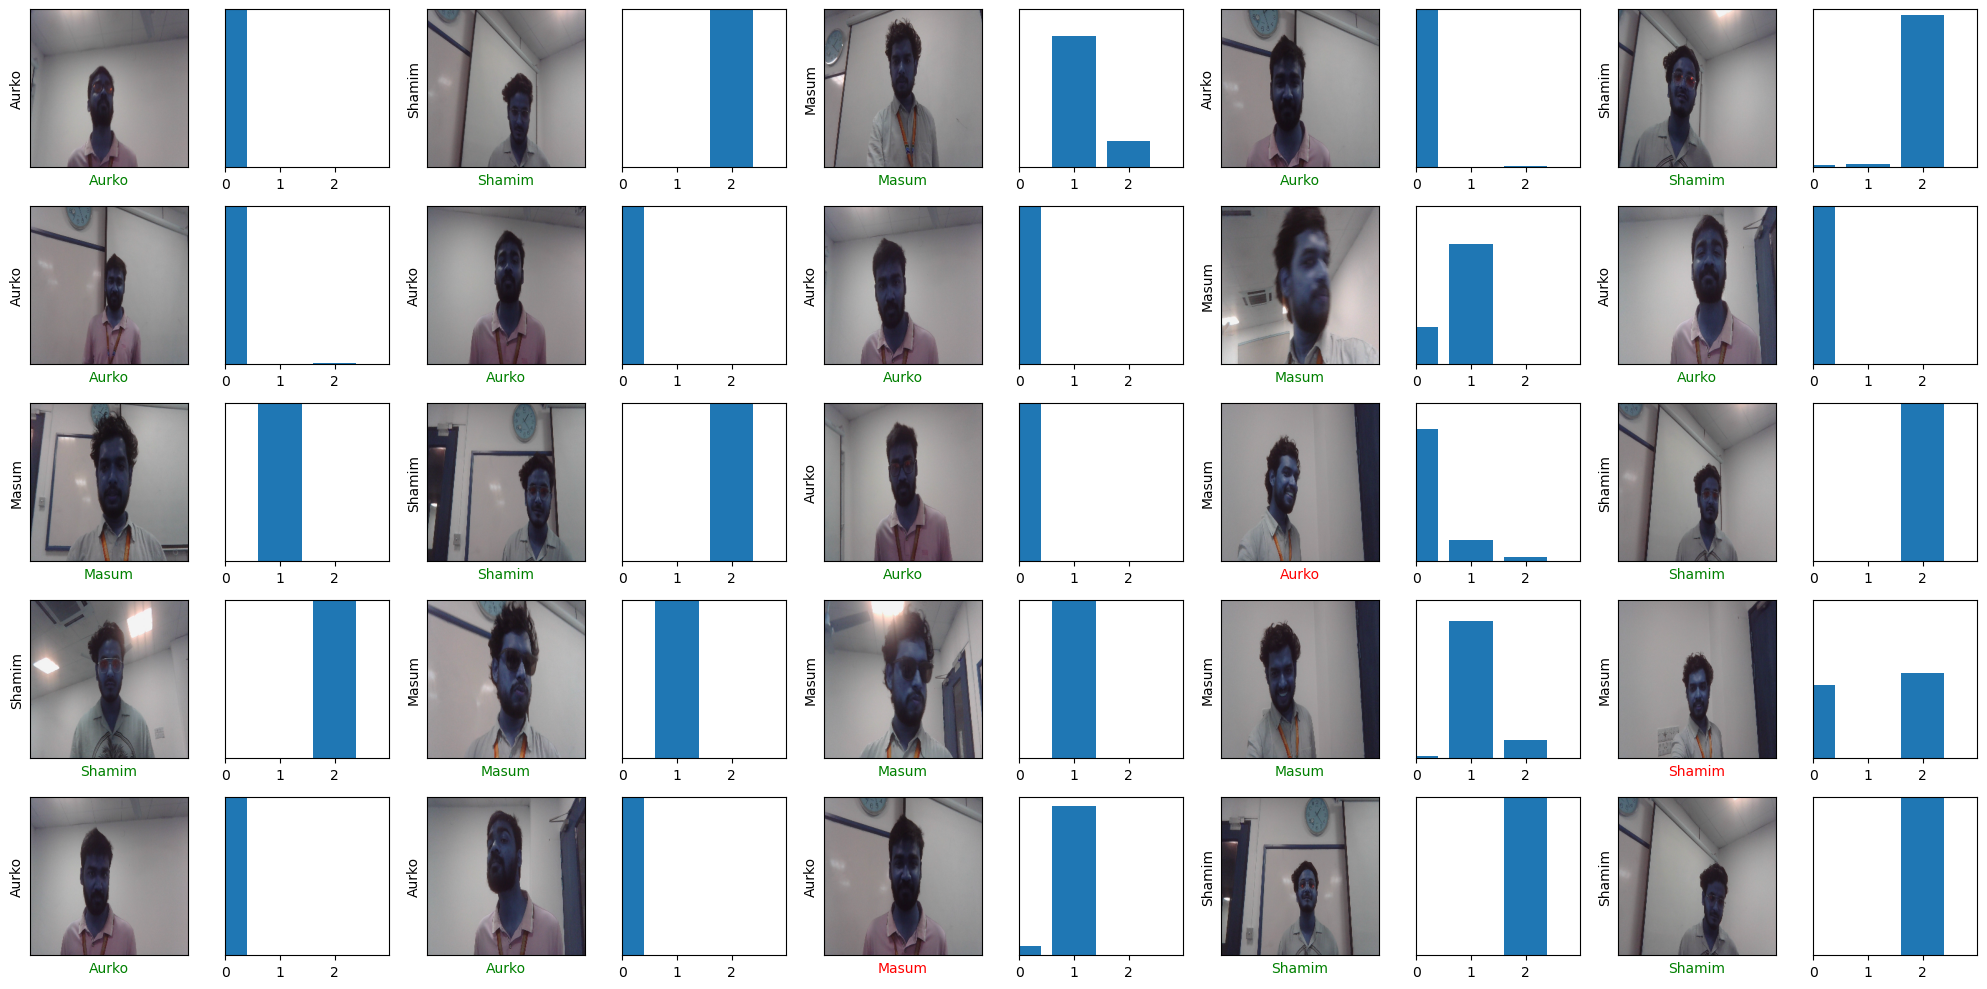

In [37]:
rows = 5
cols = 5

plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(CATEGORIES[Y_test[i]])  # <-- fixed

    predicted_class = np.argmax(predictions[i])
    if Y_test[i] == predicted_class:  # <-- fixed
        plt.xlabel(CATEGORIES[predicted_class], color='g')
    else:
        plt.xlabel(CATEGORIES[predicted_class], color='r')

    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plt.bar(range(len(predictions[i])), predictions[i])  # general, not hardcoded to 10
    plt.yticks([])
    plt.xticks(range(len(predictions[i])))
    plt.ylim([0, 1])
    plt.xlim([0, len(predictions[i])])

plt.tight_layout()
plt.show()